In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import time

In [3]:
# import the data set.
# do this directly from the github
url = "https://raw.githubusercontent.com/BUCKERS99/C7084-Big-data--Will-it-rain-tomorrow-/main/weather_data.csv"
df = pd.read_csv(url)
# print(c)

In [4]:
## EDA ####
 # showing the forst and last 5 rows of the data and all variables
df.head


<bound method NDFrame.head of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01/12/2008   Albury     13.4     22.9       0.6          NaN   
1       02/12/2008   Albury      7.4     25.1       0.0          NaN   
2       03/12/2008   Albury     12.9     25.7       0.0          NaN   
3       04/12/2008   Albury      9.2     28.0       0.0          NaN   
4       05/12/2008   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  21/06/2017    Uluru      2.8     23.4       0.0          NaN   
145456  22/06/2017    Uluru      3.6     25.3       0.0          NaN   
145457  23/06/2017    Uluru      5.4     26.9       0.0          NaN   
145458  24/06/2017    Uluru      7.8     27.0       0.0          NaN   
145459  25/06/2017    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W  

In [5]:
# looking at the data types and non-null values
df.info()
# this shows that there is some NA values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# look at the column names
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [7]:
# separate the model features and target
model_features = df.columns.drop('RainTomorrow')
model_target = 'RainTomorrow'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')
Model target:  RainTomorrow


In [8]:
numerical_features_full = df[model_features].select_dtypes(include=np.number).columns
factor_features_full = df[model_features].select_dtypes(include='object').columns
print(df[model_features].select_dtypes(include=np.number).columns)
print(df[model_features].select_dtypes(include='object').columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')


In [ ]:
## EDA Plots

In [9]:
df[model_target].value_counts() # we have an unbalanced data set

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<function matplotlib.pyplot.show>

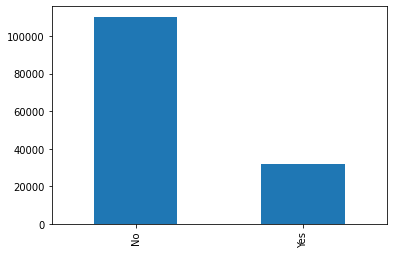

In [10]:
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show

WindGustDir


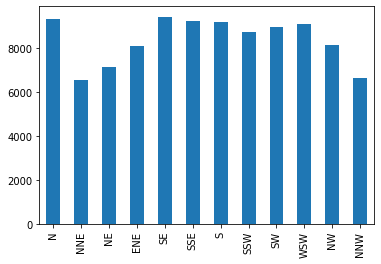

WindDir9am


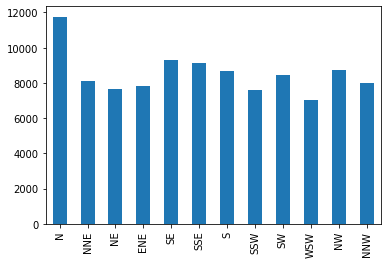

WindDir3pm


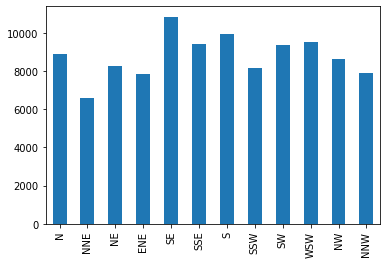

RainToday


KeyError: ignored

In [11]:
# We can visualise plots for varibles that have less than 20 levels
#for c in factor_features_full:
#    if len(df[c].value_counts()) < 20:
#        print(c)
#        df[c].value_counts().plot.bar()
#        plt.show()
# these visualisations of the direction are not informative until the x axis is the same throughout.
compass_order = ["N", "NNE", "NE", "ENE", "SE", "SSE", "S", "SSW", "SW", "WSW", "NW", "NNW"] # this wont show the RaintToday plot

for c in factor_features_full:
    if len(df[c].value_counts()) < 20:
        print(c)
        df[c].value_counts().loc[compass_order].plot.bar()
        plt.show()

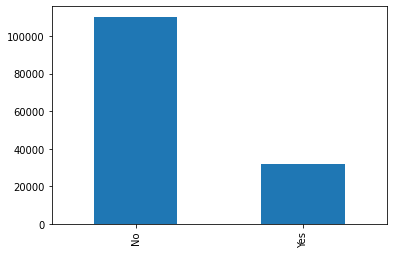

In [12]:
df['RainToday'].value_counts().plot.bar()

MinTemp


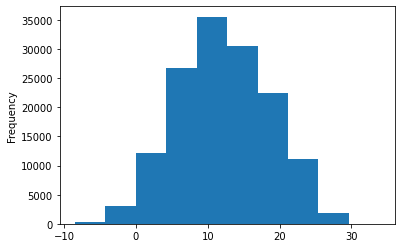

MaxTemp


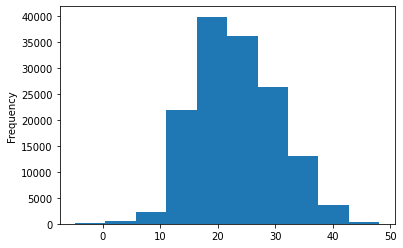

Rainfall


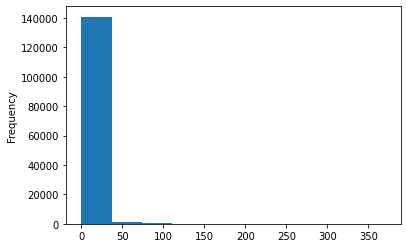

Evaporation


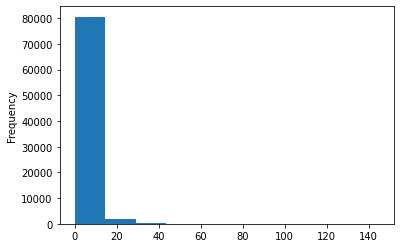

Sunshine


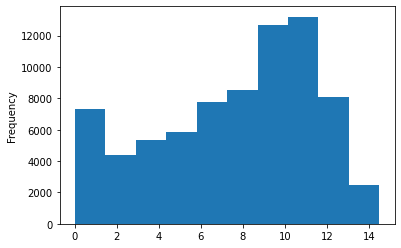

WindGustSpeed


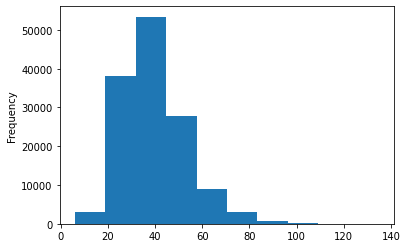

WindSpeed9am


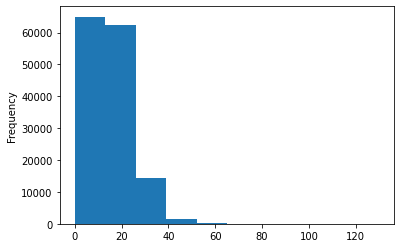

WindSpeed3pm


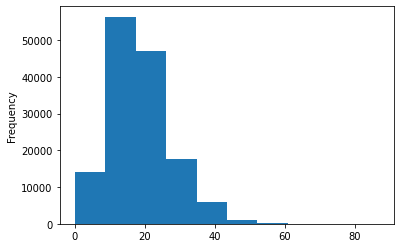

Humidity9am


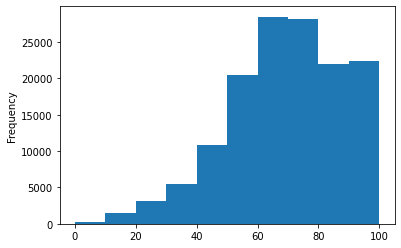

Humidity3pm


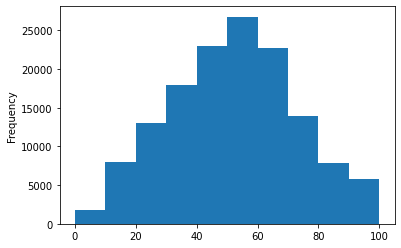

Pressure9am


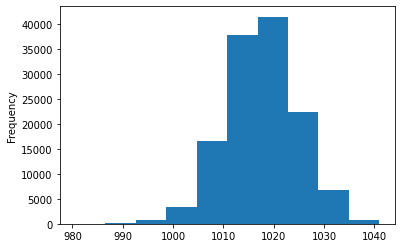

Pressure3pm


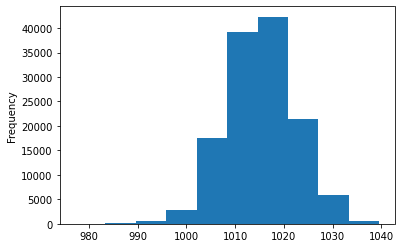

Cloud9am


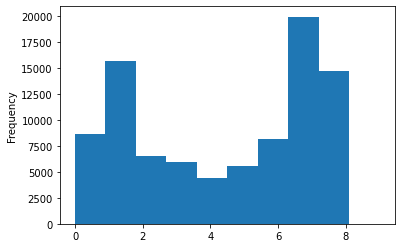

Cloud3pm


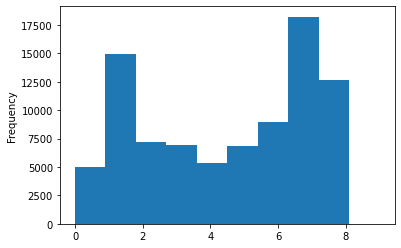

Temp9am


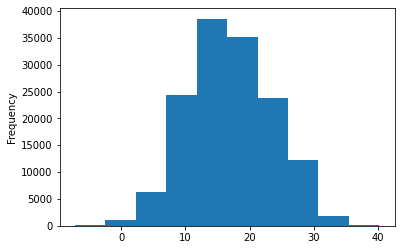

Temp3pm


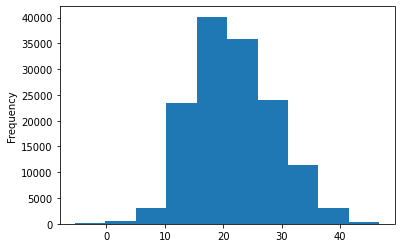

In [13]:
# plot the numerical data as histograms
for c in numerical_features_full:
    print(c)
    df[c].plot.hist(bins=10)
    plt.show()

In [ ]:
# correlations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


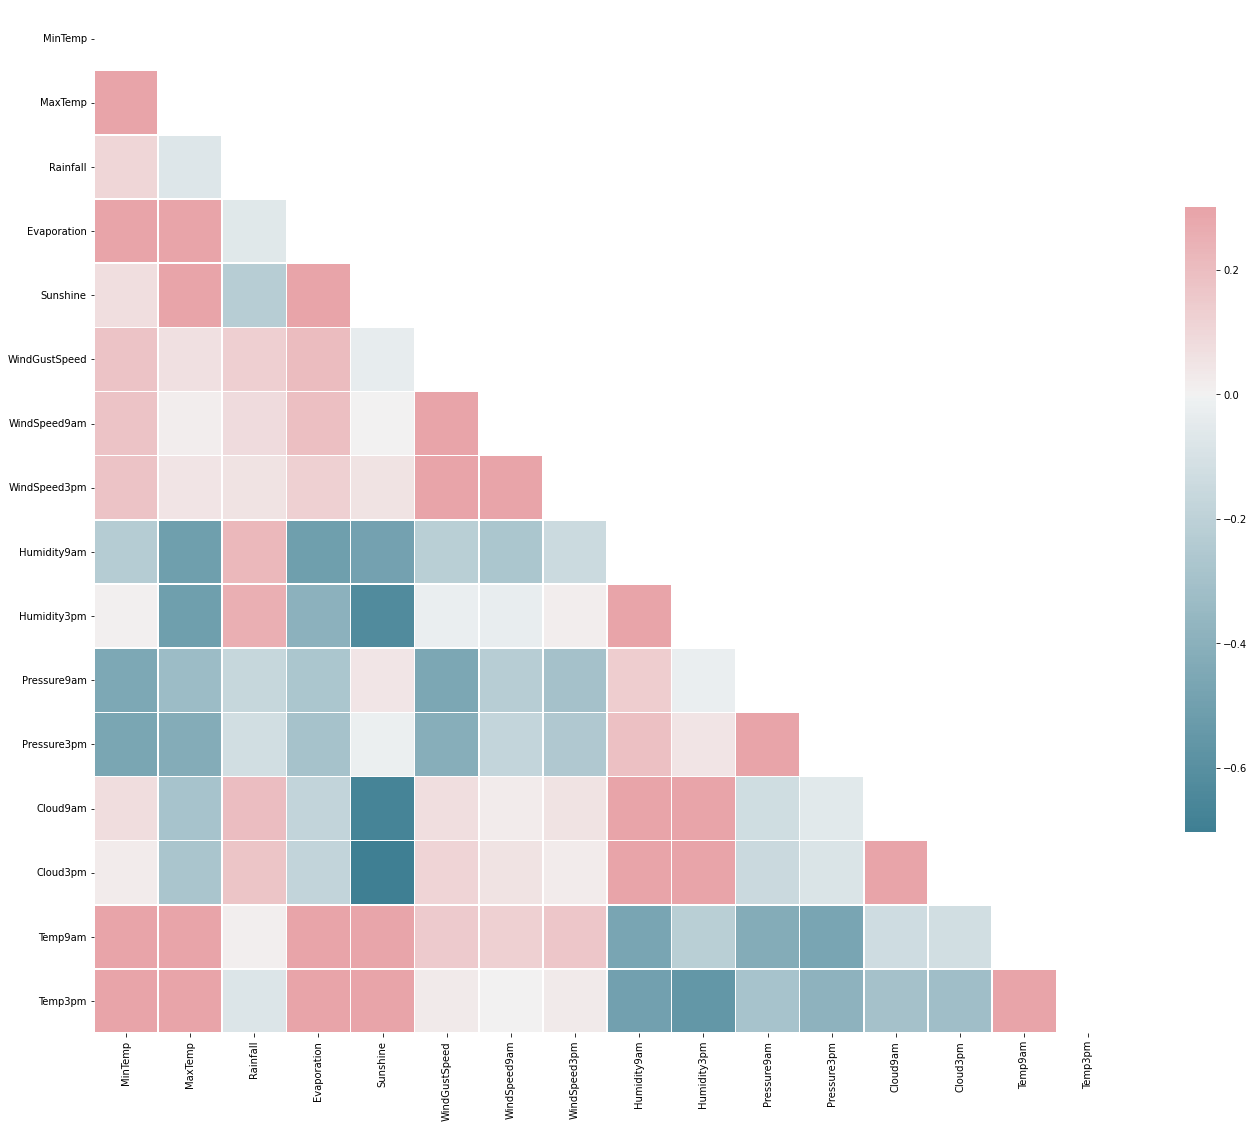

In [14]:
# Correlation heatmap

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool))

f, ax = plt.subplots(figsize= (23,23))

cmap = sns.diverging_palette(220, 10,as_cmap=True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax= .3, center = 0,
            square = True, linewidth = .5, cbar_kws = {"shrink": .5})

In [ ]:
# NA values need sorting, if they are in the dependent variable "RainTomorrow" they need removing

In [15]:
df.isna().sum()
# we can see that there are missing values in all of the varibles, but for the moment we will remove just the dependant variable NA's

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [16]:
df_NA = df.dropna(subset=["RainTomorrow"])
# run the code from line 53 again to check if this has removed the values
df_NA.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [17]:
# we will also check that the rows have been removed. We expect to see 142,193 total observations
df_NA.shape
# this is correct.

(142193, 23)

In [18]:
# Our dependent variable is a factor of 2 levels (Categorical) so we will first run a KNN model to see what type of accuracy we achieve

# We first need to split the data set into train:test:validate 80:10:10
train_df, val_df, test_df = np.split(df_NA.sample(frac=1), [int(.80*len(df_NA)), int(.9*len(df_NA))])

In [19]:
# Check that they contain what we expect 113754:14219:14219
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)
print("!!CORRECT!!")

(113754, 23)
(14220, 23)
(14219, 23)
!!CORRECT!!


In [ ]:
# Data processing with pipeline (https://github.com/aws-samples/aws-machine-learning-university-accelerated-tab/blob/75e0dfea716b08b6566cfbc39d8c4824d4089b70/notebooks/MLA-TAB-DAY1-KNN.ipynb)

In [20]:
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])

In [21]:
# Looking at this pipeline
set_config(display = 'diagram')
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

In [22]:
# Train a classifier

x_train = train_df[numerical_features_full]
y_train = train_df[model_target]

In [23]:
# fir these to the training data
classifier.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

In [26]:
# testing the performance of classifier

start = time.time()

train_pred = classifier.predict(x_train)

#print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_pred))
print("Training accuracy:", accuracy_score(y_train, train_pred))

print(f'Time: {time.time() - start}')

              precision    recall  f1-score   support

          No       0.91      0.96      0.94     88240
         Yes       0.83      0.69      0.75     25514

    accuracy                           0.90    113754
   macro avg       0.87      0.82      0.85    113754
weighted avg       0.90      0.90      0.90    113754

Training accuracy: 0.8993705715842959
Time: 195.8467071056366


In [27]:
# Assessing accuracy on the test data

x_test = test_df[numerical_features_full]
y_test = test_df[model_target]

In [36]:
# Validation for bes k-value
from sklearn.model_selection import cross_val_score
start = time.time()

scores = cross_val_score(classifier, x_train, y_train, cv = 5, scoring = 'accuracy')
print(scores)

# average of scores
print(scores.mean())

print(f'Time: {time.time() - start}')

[0.82646917 0.82317261 0.82488682 0.82708452 0.82334066]
0.8249907550495305
Time: 148.48969769477844


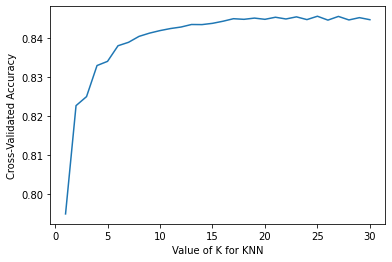

Time: 6143.0669298172


In [37]:
# choose k between 1 to 31
start = time.time()

k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    classifier = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = k))
])
    scores = cross_val_score(classifier, x_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


print(f'Time: {time.time() - start}')

In [29]:
start = time.time()
test_pred = classifier.predict(x_test)

#print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_test, test_pred))
print("Test accuracy:", accuracy_score(y_test, test_pred))

print(f'Time: {time.time() - start}')

              precision    recall  f1-score   support

          No       0.87      0.92      0.89     10982
         Yes       0.65      0.52      0.58      3238

    accuracy                           0.83     14220
   macro avg       0.76      0.72      0.73     14220
weighted avg       0.82      0.83      0.82     14220

Test accuracy: 0.8266526019690577
Time: 23.59278964996338
